# 1. Importando as Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf

# 2. Baixando os dados históricos

In [3]:
# Função criada para baixar os dados
def extracao_bcb(codigo, data_inicio, data_fim):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json&dataInicial={data_inicio}&dataFinal={data_fim}'
    df = pd.read_json(url)
    df.set_index('data', inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True) 
    return df

In [4]:
def plot_grafico(retorno_acumulado, title, ajuste_x=True):
    fig, ax = plt.subplots(figsize=(12, 4))
    (retorno_acumulado * 100).plot(ax=ax)  

    # Configuração dos títulos
    if title:
        ax.set_title(title)        
    ax.set_ylabel('Retorno (%)')
    ax.set_xlabel(None)
    
    if ajuste_x:
        # Criar rótulos personalizados no formato MM/YY
        custom_labels = retorno_acumulado.index.strftime('%m/%y')

        # Ajustar os ticks do eixo X
        ax.set_xticks(retorno_acumulado.index[::3])  
        ax.set_xticklabels(custom_labels[::3], rotation=30)
        ax.xaxis.set_minor_locator(plt.NullLocator())
    
    sns.despine()

In [5]:
#Período 
dt_inicio_br = "01/02/2020"
dt_fim_br = "01/02/2025"

dt_inicio_en = "2020-02-01"
dt_fim_en = "2025-02-01"

 ### Retorno IPCA
 * Código: 433 - Variação mensal (%)

In [6]:
ipca_df = extracao_bcb(433, dt_inicio_br, dt_fim_br)

In [7]:
ipca_df.rename(columns={'valor':'IPCA'}, inplace=True)

In [8]:
ipca_retorno_acumulado = ((1 + ipca_df.shift(1, fill_value=0)/100).cumprod() - 1)

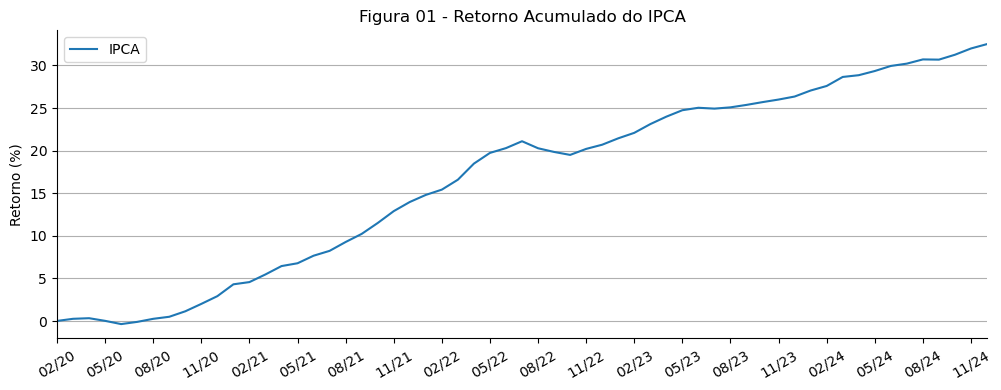

In [9]:
plot_grafico(ipca_retorno_acumulado, title='Figura 01 - Retorno Acumulado do IPCA')
plt.grid(axis='y')
plt.savefig(f'imagens/Figura 01 - Retorno Acumulado do IPCA')
plt.show()

 ### Retorno CDI

In [10]:
cdi_df = extracao_bcb(4391, dt_inicio_br, dt_fim_br)

In [11]:
cdi_df.rename(columns={'valor':'CDI'}, inplace=True)

In [12]:
cdi_retorno_acumulado = ((1 + cdi_df.shift(1, fill_value=0)/100).cumprod() - 1)

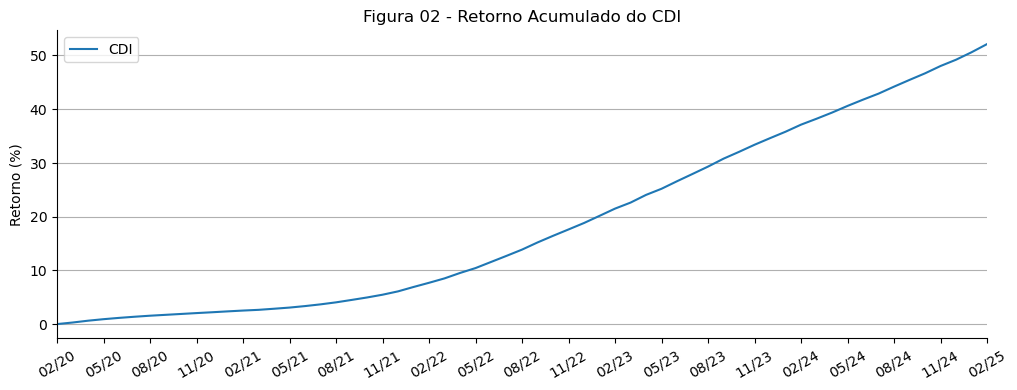

In [13]:
plot_grafico(cdi_retorno_acumulado, title='Figura 02 - Retorno Acumulado do CDI')
plt.grid(axis='y')
plt.savefig(f'imagens/Figura 02 - Retorno Acumulado do CDI')
plt.show()

 ### Retorno IBOVESPA

In [14]:
ibovespa_df = yf.download('^BVSP', start='2020-02-01', interval='1mo', progress=False)[['Adj Close']]

In [15]:
ibovespa_df = ibovespa_df.rename(columns={'Adj Close':'Ibovespa'})

In [16]:
ibovespa_retorno = ibovespa_df.pct_change(1) 
ibovespa_retorno_acumulado = (1 + ibovespa_retorno.fillna(0)).cumprod() - 1

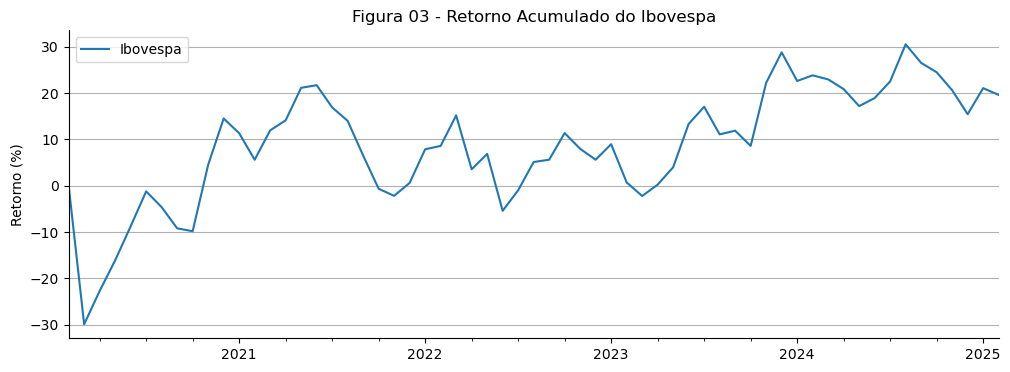

In [17]:
plot_grafico(ibovespa_retorno_acumulado, title='Figura 03 - Retorno Acumulado do Ibovespa', ajuste_x=False)
plt.grid(axis='y')
plt.savefig(f'imagens/Figura 03 - Retorno Acumulado do Ibovespa')
plt.show()

 ### Retorno IVVB11

In [18]:
ivvb11_df = yf.download('IVVB11.SA', start='2020-02-01', interval='1mo', progress=False)[['Adj Close']]

In [19]:
ivvb11_df = ivvb11_df.rename(columns={'Adj Close':'IVVB11'})

In [20]:
ivvb11_retorno = ivvb11_df.pct_change(1) 
ivvb11_retorno_acumulado = (1 + ivvb11_retorno).cumprod().fillna(1) - 1

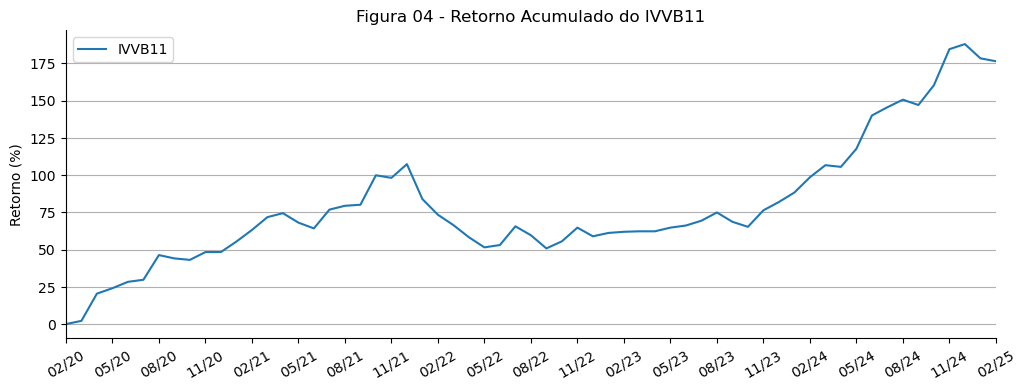

In [21]:
plot_grafico(ivvb11_retorno_acumulado, title='Figura 04 - Retorno Acumulado do IVVB11')
plt.grid(axis='y')
plt.savefig(f'imagens/Figura 04 - Retorno Acumulado do IVVB11')
plt.show()

# 3. Comparando Retornos

In [22]:
# Juntando todos retornos em um único dataframe
retornos = pd.concat(
    [ipca_retorno_acumulado, cdi_retorno_acumulado, ibovespa_retorno_acumulado, ivvb11_retorno_acumulado], 
    axis=1)

In [23]:
retornos.tail()

,IPCA,CDI,Ibovespa,IVVB11
2024-10-01,0.312431,0.466576,0.245181,1.603702
2024-11-01,0.319781,0.480215,0.206351,1.845790
2024-12-01,0.324928,0.491909,0.154658,1.880051
2025-01-01,NaN,0.505784,0.210834,1.784332
2025-02-01,NaN,0.520992,0.196285,1.764905


* Como não temos os dois últimos IPCA, vamos adotar o último valor para eles

In [24]:
# Repetindo os últimos valores
retornos.ffill(inplace=True)

In [25]:
# Veja que agora está preenchido
retornos.tail()

,IPCA,CDI,Ibovespa,IVVB11
2024-10-01,0.312431,0.466576,0.245181,1.603702
2024-11-01,0.319781,0.480215,0.206351,1.845790
2024-12-01,0.324928,0.491909,0.154658,1.880051
2025-01-01,0.324928,0.505784,0.210834,1.784332
2025-02-01,0.324928,0.520992,0.196285,1.764905


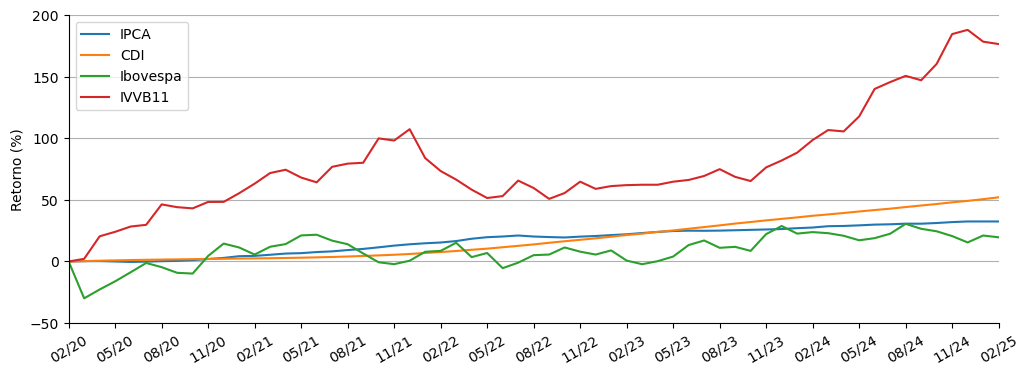

In [26]:
plot_grafico(retornos, title='Figura 05 - Rentabilidades de no Período analisado')
plt.grid(axis='y')
plt.yticks([-50, 0, 50, 100, 150, 200])
plt.title(None)
plt.savefig(f'imagens/Figura 05 - Rentabilidades de no Período analisado')
plt.show()

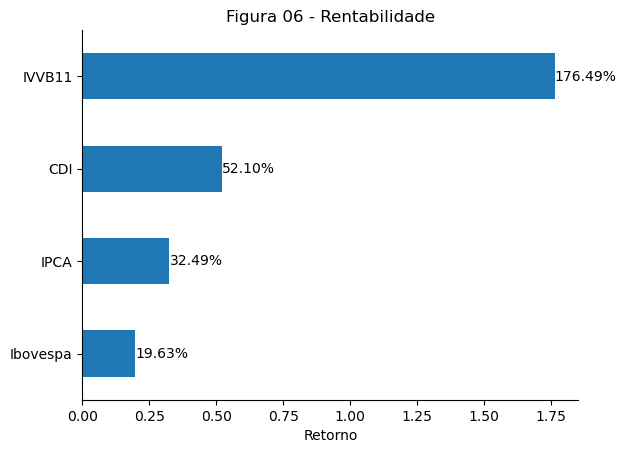

In [28]:
ax = retornos.iloc[-1].sort_values().plot.barh()

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2%}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10)  # Ajuste de alinhamento

plt.title('Figura 06 - Rentabilidade')
plt.xlabel('Retorno')
sns.despine()
plt.savefig(f'imagens/Figura 06 - Rentabilidade')